# livedoorニュースの分類
## Janomeのインストール

In [1]:
!pip install janome

## データファイルのダウンロードと解凍

In [1]:
import tarfile 
from urllib.request import urlretrieve

FILE_URL = 'https://www.rondhuit.com/download/ldcc-20140209.tar.gz'
FILE_PATH = '/content/ldcc-20140209.tar.gz'
EXTRACT_DIR = '/content'

urlretrieve(FILE_URL, FILE_PATH)

mode = "r:gz"
tar = tarfile.open(FILE_PATH, mode) 
tar.extractall(EXTRACT_DIR) 
tar.close()

In [2]:
!ls -l /content/text

total 364
-rw-r--r-- 1 501 staff   223 Sep 15  2012 CHANGES.txt
drwxr-xr-x 2 501 staff 53248 Feb  9  2014 dokujo-tsushin
drwxr-xr-x 2 501 staff 36864 Feb  9  2014 it-life-hack
drwxr-xr-x 2 501 staff 53248 Feb  9  2014 kaden-channel
drwxr-xr-x 2 501 staff 32768 Feb  9  2014 livedoor-homme
drwxr-xr-x 2 501 staff 36864 Feb  9  2014 movie-enter
drwxr-xr-x 2 501 staff 36864 Feb  9  2014 peachy
-rw-r--r-- 1 501 staff  2182 Sep 13  2012 README.txt
drwxr-xr-x 2 501 staff 36864 Feb  9  2014 smax
drwxr-xr-x 2 501 staff 40960 Feb  9  2014 sports-watch
drwxr-xr-x 2 501 staff 36864 Feb  9  2014 topic-news


## 記事ファイルの読み込み

In [4]:
import os
import pandas as pd

base_dir = '/content/text'

category = pd.Series(name='category', dtype='str')
url = pd.Series(name='url', dtype='str')
time_published = pd.Series(name='time_published', dtype='object')
title = pd.Series(name='title', dtype='str')
text = pd.Series(name='text', dtype='str')

index = 0

for name in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, name)):
        for file in os.listdir(os.path.join(base_dir, name)):
            if file != 'LICENSE.txt':
                with open(os.path.join(base_dir, name, file), 'r') as f:
                    lines = f.readlines()
                category.at[index] = name
                url.at[index] = lines[0].rstrip()
                time_published.at[index] = lines[1].rstrip()
                title.at[index] = lines[2].rstrip()
                text.at[index] = ''.join(lines[3:])
                index += 1

In [5]:
df = pd.concat([category, url, time_published, title, text], axis=1)

In [6]:
df.head()

,category,url,time_published,title,text
0,movie-enter,http://news.livedoor.com/article/detail/6660936/,2012-06-15T15:00:00+0900,構想2年、機能性バツグンの“バットマン”メガネが登場,世界的な社会現象を巻き起こした映画『ダークナイト』の続編『ダークナイト ライジング』（7月...
1,movie-enter,http://news.livedoor.com/article/detail/6371369/,2012-03-16T09:45:00+0900,3社競合“はやぶさ”ツイッター総選挙「そっくりさんは誰だ？」,2010年6月、打ち上げから7年間で60億キロの宇宙の旅から帰還し、人類初のプロジェクトを...
2,movie-enter,http://news.livedoor.com/article/detail/6111189/,2011-12-12T16:20:00+0900,『スター・ウォーズ』や『アバター』に多大な影響を与えた世紀の大作、注目度No.1俳優が登場,ウォルト・ディズニー生誕110周年にあたる記念すべき2012年、ディズニー・スタジオの総力...
3,movie-enter,http://news.livedoor.com/article/detail/6222078/,2012-01-25T20:39:00+0900,『荒川アンダーザブリッジ』プレミアイベントに林遣都、桐谷美玲、安倍なつみらキャストが大集合,映画『荒川アンダーザブリッジ THE MOVIE』（2月4日公開）のプレミアイベントが25日...
4,movie-enter,http://news.livedoor.com/article/detail/6397393/,2012-03-26T10:30:00+0900,“最凶”の教育映画『先生を流産させる会』の劇場公開が実現,「生まれる前に死んだんでしょ。いなかったのと同じじゃん」\n\n 公開を前にネットで話題騒...


## Janomeによるテキストのトークン化

In [7]:
from janome.tokenizer import Tokenizer

t_wakati = Tokenizer(wakati=True)

def tokenize_japanese(text):
    return ' '.join(list(t_wakati.tokenize(text)))

In [9]:
df['text'] = df['text'].map(tokenize_japanese)

In [10]:
df.head()

,category,url,time_published,title,text
0,movie-enter,http://news.livedoor.com/article/detail/6660936/,2012-06-15T15:00:00+0900,構想2年、機能性バツグンの“バットマン”メガネが登場,世界 的 な 社会 現象 を 巻き起こし た 映画 『 ダーク ナイト 』 の 続編 『 ダ...
1,movie-enter,http://news.livedoor.com/article/detail/6371369/,2012-03-16T09:45:00+0900,3社競合“はやぶさ”ツイッター総選挙「そっくりさんは誰だ？」,2010 年 6 月 、 打ち上げ から 7 年間 で 60 億 キロ の 宇宙 の 旅 か...
2,movie-enter,http://news.livedoor.com/article/detail/6111189/,2011-12-12T16:20:00+0900,『スター・ウォーズ』や『アバター』に多大な影響を与えた世紀の大作、注目度No.1俳優が登場,ウォルト・ディズニー 生誕 110 周年 にあたる 記念 す べき 2012 年 、 ディズ...
3,movie-enter,http://news.livedoor.com/article/detail/6222078/,2012-01-25T20:39:00+0900,『荒川アンダーザブリッジ』プレミアイベントに林遣都、桐谷美玲、安倍なつみらキャストが大集合,映画 『 荒川 アンダーザブリッジ THE MOVIE 』 （ 2 月 4 日 公開...
4,movie-enter,http://news.livedoor.com/article/detail/6397393/,2012-03-26T10:30:00+0900,“最凶”の教育映画『先生を流産させる会』の劇場公開が実現,「 生まれる 前 に 死ん だ ん でしょ 。 い なかっ た の と 同じ じゃん 」 \...


## KerasのTokenizerにより単語を整数にエンコード

In [11]:
import tensorflow as tf

MAX_WORDS = 20000 # 最も頻度の高い20,000語のみエンコード

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_WORDS)

tokenizer.fit_on_texts(df['text'])

In [12]:
df['sequence'] = tokenizer.texts_to_sequences(df['text'])

In [13]:
word2int = tokenizer.word_index

In [14]:
print(df['sequence'][0])

[157, 72, 17, 669, 2038, 5, 5115, 9, 76, 43, 1610, 1578, 44, 2, 3231, 43, 1610, 1578, 3536, 44, 19, 130, 52, 648, 37, 149, 18, 2, 149, 5, 848, 12, 8, 1, 443, 10, 868, 5, 608, 21, 54, 7707, 737, 53, 11, 2377, 12, 9, 3362, 5, 115, 21, 23, 6, 492, 12, 9, 3, 25, 121, 1, 115, 26, 66, 3362, 7, 593, 78, 555, 1, 606, 50, 307, 2, 639, 6, 77, 1, 593, 120, 2960, 3, 54, 2657, 5283, 53, 11, 7984, 1, 443, 2, 7707, 737, 10, 152, 52, 759, 37, 93, 4187, 506, 10, 310, 26, 66, 3, 25, 144, 204, 2, 149, 100, 6, 284, 9, 558, 29, 121, 2, 718, 6, 2533, 117, 1, 310, 4, 3742, 73, 4, 50, 55, 226, 2, 16719, 6, 4351, 8, 20, 3, 144, 204, 2, 157, 420, 5, 972, 21, 86, 1, 414, 34, 11799, 5, 147, 239, 15, 2440, 3, 7707, 737, 363, 275, 942, 598, 6, 14598, 2, 3362, 5283, 5, 7184, 1429, 9, 3, 25, 2, 2886, 5, 1674, 21, 472, 4, 15, 449, 26, 30, 8, 20, 36, 5173, 5, 449, 3, 5047, 2, 2678, 34, 6987, 2349, 1, 9564, 2, 2534, 1, 15916, 41, 1, 144, 204, 4, 193, 21, 549, 2, 1776, 5, 9565, 4, 11800, 1, 144, 204, 2, 157, 420, 5, 8273

## Kerasのpad_sequencesで長さを統一

In [15]:
MAX_LENGTH = 5000

x_seq = tf.keras.preprocessing.sequence.pad_sequences(df['sequence'], maxlen=MAX_LENGTH)

## カテゴリーを整数にエンコーディング

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['encoded_label'] = le.fit_transform(df['category'])

## （１）テキストをマルチホットエンコーディング

（サンプル数×最大単語数）のオールゼロ行列を準備する。

In [17]:
import numpy as np

words_multi_hot = np.zeros((x_seq.shape[0], MAX_WORDS))
words_multi_hot.shape

(7367, 20000)

テキスト中にある単語のコードをインデックスにして１を立てる

In [18]:
for i in range(x_seq.shape[0]):
    words_multi_hot[i,x_seq[i]] = 1

In [19]:
words_multi_hot[0]

array([1., 1., 1., ..., 0., 0., 0.])

In [20]:
num_categories = len(np.unique(df['category']))

model = tf.keras.models.Sequential()

inputs = tf.keras.Input(shape=(20000,))

model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(20000,)))
model.add(tf.keras.layers.Dense(num_categories, activation='softmax'))

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(words_multi_hot, df['encoded_label'], test_size=0.3)

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
          optimizer='adam',
          metrics=['acc'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
162/162 [==============================] - 3s 8ms/step - loss: 0.6735 - acc: 0.7820 - val_loss: 0.1501 - val_acc: 0.9543
Epoch 2/10
162/162 [==============================] - 1s 5ms/step - loss: 0.0157 - acc: 0.9972 - val_loss: 0.1266 - val_acc: 0.9629
Epoch 3/10
162/162 [==============================] - 1s 5ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.1628 - val_acc: 0.9534
Epoch 4/10
162/162 [==============================] - 1s 5ms/step - loss: 0.0078 - acc: 0.9998 - val_loss: 0.1251 - val_acc: 0.9665
Epoch 5/10
162/162 [==============================] - 1s 5ms/step - loss: 0.0021 - acc: 0.9999 - val_loss: 0.1396 - val_acc: 0.9634
Epoch 6/10
162/162 [==============================] - 1s 6ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1363 - val_acc: 0.9625
Epoch 7/10
162/162 [==============================] - 1s 5ms/step - loss: 0.0014 - acc: 0.9999 - val_loss: 0.1353 - val_acc: 0.9638
Epoch 8/10
162/162 [==============================] - 1s 5ms/step - loss: 0.

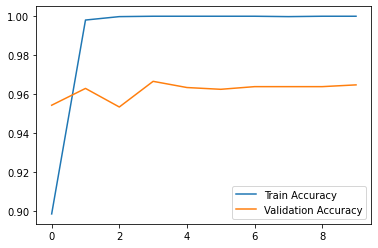

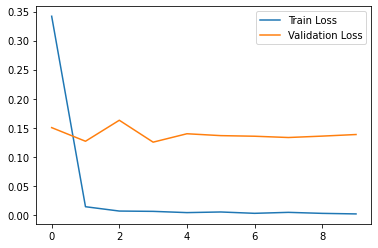

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

## （２）単語埋め込み

In [ ]:
emb_dim = 128

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(MAX_WORDS, emb_dim, input_length=MAX_LENGTH))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(num_categories, activation='softmax'))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_seq, df['encoded_label'], test_size=0.3)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
          optimizer='adam',
          metrics=['acc'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    verbose=1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

## RNN（LSTM）を使ってみる

In [ ]:
EMB_DIMS = 128

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(MAX_WORDS, EMB_DIMS, input_length=MAX_LENGTH))
model.add(tf.keras.layers.Dropout(rate=0.4, noise_shape=(None, 1, EMB_DIMS)))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(num_categories, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_seq, df['encoded_label'], test_size=0.3)

history = model.fit(x_train, y_train,
                    batch_size=30,
                    epochs=20,
                    validation_data=(x_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()